In [75]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
plt.style.use('default')
import geopandas as gpd
import geodatasets
import ast
from shapely import wkt
import folium

#reading in data
allAvgWalkingTime = pd.read_csv('../avgTravelTime/averageWalkingTimeNeighborhoods.csv')
allAvgCyclingTime = pd.read_csv('../avgTravelTime/averageCyclingTimeNeighborhoods.csv')
allAvgDrivingTime = pd.read_csv('../avgTravelTime/averageDrivingTimeNeighborhoods.csv')
whiteAvgWalkingTime = pd.read_csv('../avgTravelTime/WhiteAloneaverageWalkingTimeNeighborhoods.csv')
blackAvgWalkingTime = pd.read_csv('../avgTravelTime/BlackorAfricanAmericanAloneaverageWalkingTimeNeighborhoods.csv')
demoAvgWalkingTime = pd.read_csv('../../data/dani data/allDemsWalkingTimes.csv')
lessThanHS = pd.read_csv('../avgTravelTime/wt__less_than_high_school.csv')

walkingNeighborhoods = pd.read_csv('../avgTravelTime/completedWalkingNeighborhoodRadiiDF.csv')
cyclingNeighborhoods = pd.read_csv('../avgTravelTime/completedCyclingNeighborhoodRadiiDF.csv')
drivingNeighborhoods = pd.read_csv('../avgTravelTime/completedDrivingNeighborhoodRadiiDF.csv')

chicagoCommunityAreas = pd.read_csv('../avgTravelTime/CommAreas.csv')

populationDemographics = pd.read_csv('../../data/clean/population_demographics.csv')

In [76]:
censusTracts = populationDemographics[['geoid','geometry','qualifying name', 'current land area (sq. m)', 'current water area (sq. m)', ]]

censusTracts = gpd.GeoDataFrame(
    censusTracts.loc[:, [c for c in censusTracts.columns if c != "geometry"]],
    geometry=gpd.GeoSeries.from_wkt(censusTracts["geometry"]),
    crs="epsg:4326",
    )

In [77]:
combinedCensusTracts = gpd.GeoDataFrame({'BRANCH': ['All Tracts'],'geometry': [censusTracts.loc[0,'geometry']]})
for i in range(censusTracts.shape[0] - 1):    
        oneTract = gpd.GeoDataFrame({'Tract': [censusTracts.loc[i,'geoid']],'geometry': [censusTracts.loc[i+1,'geometry']]})
        combinedCensusTracts = combinedCensusTracts.union(oneTract, align = True)

In [4]:
combinedCensusTracts = combinedCensusTracts.set_crs(4326)

Text(0.5, 1.0, 'Average Walking Time to Local Library')

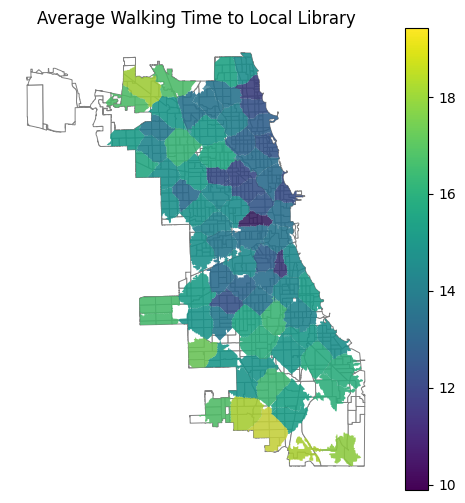

In [5]:
allAvgWalkingTime['geometry'] = walkingNeighborhoods['geometry']
allAvgWalkingTime = gpd.GeoDataFrame(
    allAvgWalkingTime.loc[:, [c for c in allAvgWalkingTime.columns if c != "geometry"]],
    geometry=gpd.GeoSeries.from_wkt(allAvgWalkingTime["geometry"]),
    crs="epsg:4326",
    )

allAvgWalkingTime = gpd.clip(allAvgWalkingTime,combinedCensusTracts)

fig, ax = plt.subplots(1, figsize=(6, 6))
base = censusTracts.plot(ax=ax, color='white', edgecolor='gray', linewidth=.7)
allAvgWalkingTime.plot(column='Average Walking Time (Minutes)', legend=True, ax=base, alpha = .85)
allAvgWalkingTime.plot(ax=base, color='teal', alpha = .2)
ax.axis('off')
ax.set_title('Average Walking Time to Local Library', fontdict={'fontsize': '12', 'fontweight' : '3'})

/opt/tljh/user/lib/python3.9/site-packages/geopandas/geodataframe.py:1537: UserWarning: Geometry column does not contain geometry.
  warnings.warn("Geometry column does not contain geometry.")


Text(0.5, 1.0, 'Average Cycling Time to Local Library')

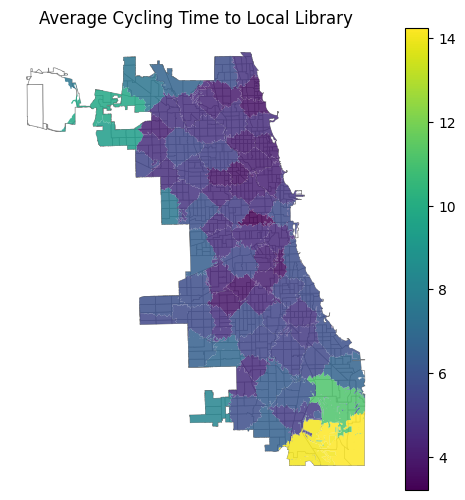

In [7]:
allAvgCyclingTime['geometry'] = cyclingNeighborhoods['geometry']
allAvgCyclingTime = gpd.GeoDataFrame(
    allAvgCyclingTime.loc[:, [c for c in allAvgCyclingTime.columns if c != "geometry"]],
    geometry=gpd.GeoSeries.from_wkt(allAvgCyclingTime["geometry"]),
    crs="epsg:4326",
    )

allAvgCyclingTime = gpd.clip(allAvgCyclingTime,combinedCensusTracts)

fig, ax = plt.subplots(1, figsize=(6, 6))
base = censusTracts.plot(ax=ax, color='white', edgecolor='gray', linewidth = .5)
allAvgCyclingTime.plot(column='Average Cycling Time (Minutes)', legend=True, ax=base, alpha = .85)
ax.axis('off')
ax.set_title('Average Cycling Time to Local Library', fontdict={'fontsize': '12', 'fontweight' : '3'})

Text(0.5, 1.0, 'Average Driving Time to Local Library')

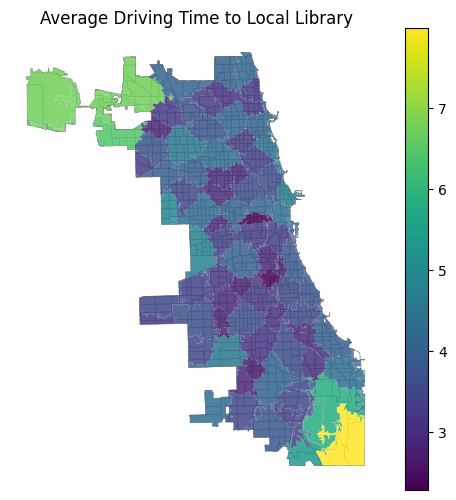

In [9]:
allAvgDrivingTime['geometry'] = drivingNeighborhoods['geometry']
allAvgDrivingTime = gpd.GeoDataFrame(
    allAvgDrivingTime.loc[:, [c for c in allAvgDrivingTime.columns if c != "geometry"]],
    geometry=gpd.GeoSeries.from_wkt(allAvgDrivingTime["geometry"]),
    crs="epsg:4326",
    )

allAvgDrivingTime = gpd.clip(allAvgDrivingTime,combinedCensusTracts)

fig, ax = plt.subplots(1, figsize=(6, 6))
base = censusTracts.plot(ax=ax, color='white', edgecolor='gray', linewidth = .5)
allAvgDrivingTime.plot(column='Average Driving Time (Minutes)', legend=True, ax=base, alpha = .85)
ax.axis('off')
ax.set_title('Average Driving Time to Local Library', fontdict={'fontsize': '12', 'fontweight' : '3'})

Text(0.5, 1.0, 'Average Walking Time (Minutes) for White Communities')

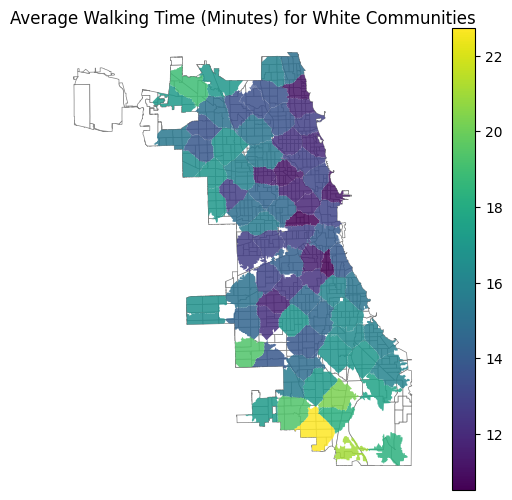

In [10]:
whiteAvgWalkingTime['geometry'] = walkingNeighborhoods['geometry']
whiteAvgWalkingTime = gpd.GeoDataFrame(
    whiteAvgWalkingTime.loc[:, [c for c in whiteAvgWalkingTime.columns if c != "geometry"]],
    geometry=gpd.GeoSeries.from_wkt(whiteAvgWalkingTime["geometry"]),
    crs="epsg:4326",
    )

whiteAvgWalkingTime = gpd.clip(whiteAvgWalkingTime,combinedCensusTracts)

fig, ax = plt.subplots(1, figsize=(6, 6))
base = censusTracts.plot(ax=ax, color='white', edgecolor='gray', linewidth = .5)
whiteAvgWalkingTime.plot(column='Average Walking Time (Minutes)', legend=True, ax=base, alpha = .85)
ax.axis('off')
ax.set_title('Average Walking Time (Minutes) for White Communities', fontdict={'fontsize': '12', 'fontweight' : '3'})

Text(0.5, 1.0, 'Average Walking Time (Minutes) for Black and African American Communities')

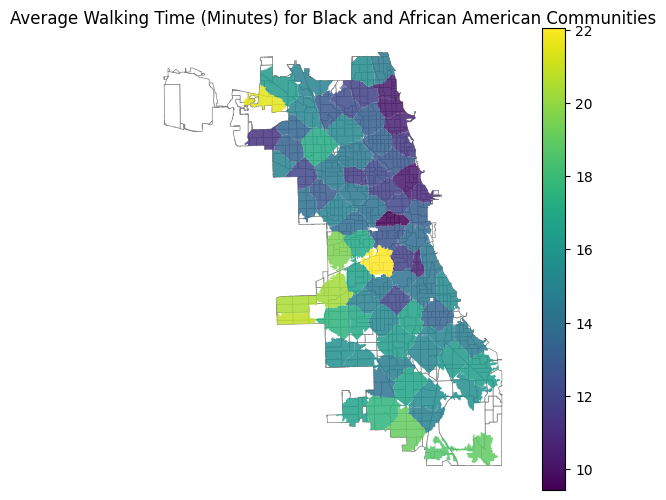

In [11]:
blackAvgWalkingTime['geometry'] = walkingNeighborhoods['geometry']
blackAvgWalkingTime = gpd.GeoDataFrame(
    blackAvgWalkingTime.loc[:, [c for c in blackAvgWalkingTime.columns if c != "geometry"]],
    geometry=gpd.GeoSeries.from_wkt(blackAvgWalkingTime["geometry"]),
    crs="epsg:4326",
    )

blackAvgWalkingTime = gpd.clip(blackAvgWalkingTime,combinedCensusTracts)

fig, ax = plt.subplots(1, figsize=(6, 6))
base = censusTracts.plot(ax=ax, color='white', edgecolor='gray', linewidth = .5)
blackAvgWalkingTime.plot(column='Average Walking Time (Minutes)', legend=True, ax=base, alpha = .85)
ax.axis('off')
ax.set_title('Average Walking Time (Minutes) for Black and African American Communities', fontdict={'fontsize': '12', 'fontweight' : '3'})

Text(0.5, 1.0, 'Average Walking Time (Minutes) for\n High School or Higher Educated')

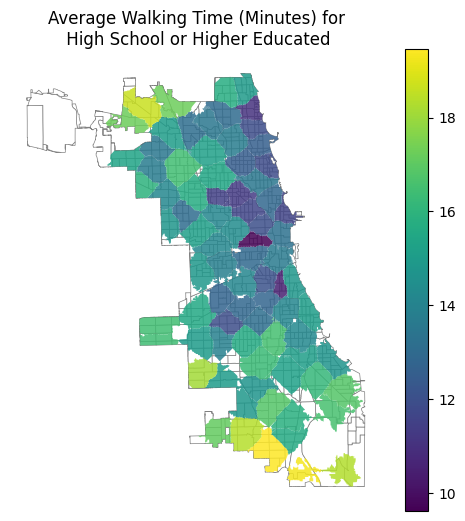

In [12]:
demoAvgWalkingTime['geometry'] = walkingNeighborhoods['geometry']
demoAvgWalkingTime = gpd.GeoDataFrame(
    demoAvgWalkingTime.loc[:, [c for c in demoAvgWalkingTime.columns if c != "geometry"]],
    geometry=gpd.GeoSeries.from_wkt(demoAvgWalkingTime["geometry"]),
    crs="epsg:4326",
    )

demoAvgWalkingTime = gpd.clip(demoAvgWalkingTime,combinedCensusTracts)

fig, ax = plt.subplots(1, figsize=(6, 6))
base = censusTracts.plot(ax=ax, color='white', edgecolor='gray', linewidth = .5)
demoAvgWalkingTime.plot(column='WT: Degree: High School or More', legend=True, ax=base, alpha = .85)
ax.axis('off')
ax.set_title('Average Walking Time (Minutes) for\n High School or Higher Educated', fontdict={'fontsize': '12', 'fontweight' : '3'})

Text(0.5, 1.0, 'Average Walking Time (Minutes) for\n Bachelors or Higher Educated')

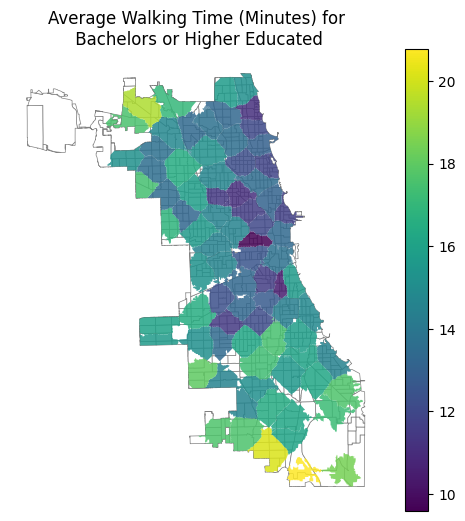

In [13]:
fig, ax = plt.subplots(1, figsize=(6, 6))
base = censusTracts.plot(ax=ax, color='white', edgecolor='gray', linewidth = .5)
demoAvgWalkingTime.plot(column='WT: Degree: Bachelors or More', legend=True, ax=base, alpha = .85)
ax.axis('off')
ax.set_title('Average Walking Time (Minutes) for\n Bachelors or Higher Educated', fontdict={'fontsize': '12', 'fontweight' : '3'})

Text(0.5, 1.0, 'Average Walking Time (Minutes) for\n Less than High School Educated')

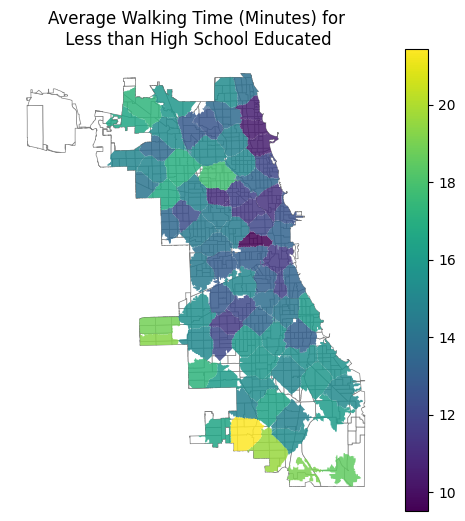

In [14]:
lessThanHS['geometry'] = walkingNeighborhoods['geometry']
lessThanHS = gpd.GeoDataFrame(
    lessThanHS.loc[:, [c for c in lessThanHS.columns if c != "geometry"]],
    geometry=gpd.GeoSeries.from_wkt(lessThanHS["geometry"]),
    crs="epsg:4326",
    )

lessThanHS = gpd.clip(lessThanHS,combinedCensusTracts)

fig, ax = plt.subplots(1, figsize=(6, 6))
base = censusTracts.plot(ax=ax, color='white', edgecolor='gray', linewidth = .5)
lessThanHS.plot(column='Average Walking Time (Minutes)', legend=True, ax=base, alpha = .85)
ax.axis('off')
ax.set_title('Average Walking Time (Minutes) for\n Less than High School Educated', fontdict={'fontsize': '12', 'fontweight' : '3'})

In [15]:
demoAvgWalkingTime.head(3)

,Unnamed: 0,Branch,WT: All,WT: White,WT: Black or African American,WT: Degree: Less than High School,WT: Degree: High School or More,WT: Degree: Some College or More,WT: Degree: Bachelors or More,WT: Degree: Masters or More,...,"WT: Income: $10,000 to $14,999","WT: Income: $150,000 to $199,999",WT: Unemployed,WT: Employed,WT: Has No Internet Access,WT: Has Internet Access,WT: Has No Computer,WT: Has Computer,"WT: Transportation: Car, Truck, or Van",geometry
32,32,Hegewisch,18.384676,18.310425,18.922580,18.510626,18.318582,18.163820,18.443415,18.471892,...,18.823250,18.303781,18.632732,18.323485,18.430732,18.405656,18.438240,18.406187,18.357833,"POLYGON ((-87.53307 41.65528, -87.53374 41.655..."
1,1,Altgeld,18.917035,21.039918,18.642701,19.401588,19.277933,19.573096,20.775590,20.044176,...,18.713678,20.698632,18.287842,19.413077,19.062588,19.045765,19.044391,19.048462,19.727854,"POLYGON ((-87.59460 41.66441, -87.59462 41.664..."
76,76,West Pullman,19.436964,22.727794,19.050420,19.632737,19.460062,19.713371,20.158480,20.567894,...,17.724576,20.341381,18.838459,19.677671,18.778637,19.677861,18.662053,19.633122,19.567288,"MULTIPOLYGON (((-87.65239 41.68945, -87.65126 ..."


Text(0.5, 1.0, 'Average Walking Time (Minutes) for\n Unemployed')

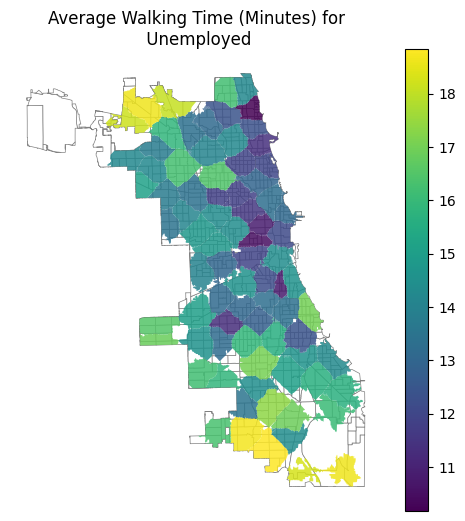

In [17]:
demoAvgWalkingTime['geometry'] = demoAvgWalkingTime['geometry']
demoAvgWalkingTime = gpd.clip(demoAvgWalkingTime,combinedCensusTracts)

fig, ax = plt.subplots(1, figsize=(6, 6))
base = censusTracts.plot(ax=ax, color='white', edgecolor='gray', linewidth = .5)
demoAvgWalkingTime.plot(column='WT: Unemployed', legend=True, ax=base, alpha = .85)
ax.axis('off')
ax.set_title('Average Walking Time (Minutes) for\n Unemployed', fontdict={'fontsize': '12', 'fontweight' : '3'})

Text(0.5, 1.0, 'Average Walking Time (Minutes) for\n Employed')

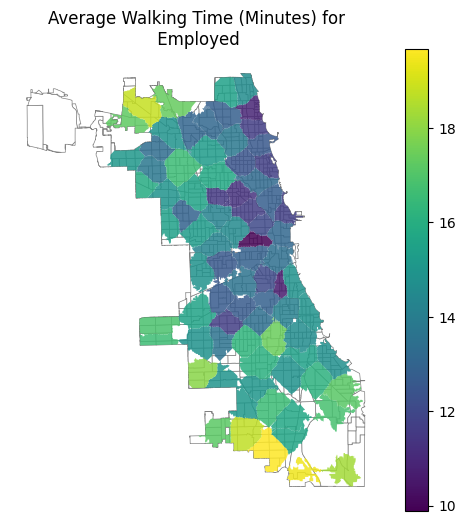

In [18]:
demoAvgWalkingTime['geometry'] = demoAvgWalkingTime['geometry']
demoAvgWalkingTime = gpd.clip(demoAvgWalkingTime,combinedCensusTracts)

fig, ax = plt.subplots(1, figsize=(6, 6))
base = censusTracts.plot(ax=ax, color='white', edgecolor='gray', linewidth = .5)
demoAvgWalkingTime.plot(column='WT: Employed', legend=True, ax=base, alpha = .85)
ax.axis('off')
ax.set_title('Average Walking Time (Minutes) for\n Employed', fontdict={'fontsize': '12', 'fontweight' : '3'})

In [37]:
chicagoCommunityAreas

,the_geom,PERIMETER,AREA,COMAREA_,COMAREA_ID,AREA_NUMBE,COMMUNITY,AREA_NUM_1,SHAPE_AREA,SHAPE_LEN
0,MULTIPOLYGON (((-87.60914087617894 41.84469250...,0,0,0,0,35,DOUGLAS,35,4.600462e+07,31027.054510
1,MULTIPOLYGON (((-87.59215283879394 41.81692934...,0,0,0,0,36,OAKLAND,36,1.691396e+07,19565.506153
2,MULTIPOLYGON (((-87.62879823733725 41.80189303...,0,0,0,0,37,FULLER PARK,37,1.991670e+07,25339.089750
3,MULTIPOLYGON (((-87.6067081256125 41.816813770...,0,0,0,0,38,GRAND BOULEVARD,38,4.849250e+07,28196.837157
4,MULTIPOLYGON (((-87.59215283879394 41.81692934...,0,0,0,0,39,KENWOOD,39,2.907174e+07,23325.167906
...,...,...,...,...,...,...,...,...,...,...
72,MULTIPOLYGON (((-87.69645961375822 41.70714491...,0,0,0,0,74,MOUNT GREENWOOD,74,7.558429e+07,48665.130539
73,MULTIPOLYGON (((-87.64215204651398 41.68508211...,0,0,0,0,75,MORGAN PARK,75,9.187734e+07,46396.419362
74,MULTIPOLYGON (((-87.83658087874365 41.98639611...,0,0,0,0,76,OHARE,76,3.718356e+08,173625.984660
75,MULTIPOLYGON (((-87.65455590025104 41.99816614...,0,0,0,0,77,EDGEWATER,77,4.844999e+07,31004.830946


In [82]:
chicagoCommunityAreas = gpd.read_file('../avgTravelTime/CommAreas.csv')

In [83]:
chicagoCommunityAreas = pd.read_csv('../avgTravelTime/CommAreas.csv')

In [84]:
chicagoCommunityAreas=chicagoCommunityAreas.rename(columns={"the_geom": "geometry"})

In [85]:
chicagoCommunityAreas.head(3)

,geometry,PERIMETER,AREA,COMAREA_,COMAREA_ID,AREA_NUMBE,COMMUNITY,AREA_NUM_1,SHAPE_AREA,SHAPE_LEN
0,MULTIPOLYGON (((-87.60914087617894 41.84469250...,0,0,0,0,35,DOUGLAS,35,4.600462e+07,31027.054510
1,MULTIPOLYGON (((-87.59215283879394 41.81692934...,0,0,0,0,36,OAKLAND,36,1.691396e+07,19565.506153
2,MULTIPOLYGON (((-87.62879823733725 41.80189303...,0,0,0,0,37,FULLER PARK,37,1.991670e+07,25339.089750


In [86]:
chicagoCommunityAreas = gpd.GeoDataFrame(
    chicagoCommunityAreas.loc[:, [c for c in chicagoCommunityAreas.columns if c != "geometry"]],
    geometry=gpd.GeoSeries.from_wkt(chicagoCommunityAreas["geometry"]),
    crs="epsg:4326",
    )

In [87]:
chicagoCommunityAreas.head(3)

,PERIMETER,AREA,COMAREA_,COMAREA_ID,AREA_NUMBE,COMMUNITY,AREA_NUM_1,SHAPE_AREA,SHAPE_LEN,geometry
0,0,0,0,0,35,DOUGLAS,35,4.600462e+07,31027.054510,"MULTIPOLYGON (((-87.60914 41.84469, -87.60915 ..."
1,0,0,0,0,36,OAKLAND,36,1.691396e+07,19565.506153,"MULTIPOLYGON (((-87.59215 41.81693, -87.59231 ..."
2,0,0,0,0,37,FULLER PARK,37,1.991670e+07,25339.089750,"MULTIPOLYGON (((-87.62880 41.80189, -87.62879 ..."


In [88]:
neighborhoodRadii = pd.read_csv('completedWalkingNeighborhoodRadiiDF.csv')
neighborhoodRadii = gpd.GeoDataFrame(
    neighborhoodRadii.loc[:, [c for c in neighborhoodRadii.columns if c != "geometry"]],
    geometry=gpd.GeoSeries.from_wkt(neighborhoodRadii["geometry"]),
    crs="epsg:4326",
    )
neighborhoodRadii

,Unnamed: 0,BRANCH,LOCATION,LATITUDE,LONGITUDE,geometry
0,0,Albany Park,"(41.97557881655979, -87.71361314512697)",41.975579,-87.713613,"MULTIPOLYGON (((-87.72184 41.99035, -87.72261 ..."
1,1,Altgeld,"(41.65719847558056, -87.59883829075173)",41.657198,-87.598838,"POLYGON ((-87.59456 41.66420, -87.59460 41.664..."
2,2,Archer Heights,"(41.80110836194246, -87.72648385568911)",41.801108,-87.726484,"MULTIPOLYGON (((-87.71500 41.80877, -87.71492 ..."
3,3,Austin,"(41.88917312206642, -87.7658203582574)",41.889173,-87.765820,"MULTIPOLYGON (((-87.75331 41.88441, -87.75306 ..."
4,4,Austin-Irving,"(41.95312267684315, -87.77928489355646)",41.953123,-87.779285,"POLYGON ((-87.78847 41.94793, -87.78971 41.947..."
...,...,...,...,...,...,...
76,76,West Pullman,"(41.67790647382097, -87.6431683153105)",41.677906,-87.643168,"MULTIPOLYGON (((-87.65235 41.68898, -87.65239 ..."
77,77,West Town,"(41.89594730478282, -87.66829305460979)",41.895947,-87.668293,"MULTIPOLYGON (((-87.66627 41.90779, -87.66602 ..."
78,78,"Whitney M. Young, Jr.","(41.7510184591363, -87.61495065361933)",41.751018,-87.614951,"POLYGON ((-87.59748 41.75102, -87.59806 41.750..."
79,79,Woodson Regional Library,"(41.720694885749005, -87.64304817213312)",41.720695,-87.643048,"MULTIPOLYGON (((-87.64675 41.72956, -87.64595 ..."


In [89]:
neighborhoodRadii = neighborhoodRadii.drop(columns = 'Unnamed: 0')

In [90]:
branchLocsOnly=neighborhoodRadii[['BRANCH','LOCATION']]
branchLocsOnly.crs = 'EPSG:4326'
branchLocsOnly[['Latitude', 'Longitude']] = [ast.literal_eval(x)[:2] for x in branchLocsOnly['LOCATION']]
branchLocsOnly = branchLocsOnly.drop(columns='LOCATION')

branchLocsOnly = gpd.GeoDataFrame(
    branchLocsOnly, geometry=gpd.points_from_xy(branchLocsOnly.Longitude, branchLocsOnly.Latitude), crs="EPSG:4326")

/tmp/ipykernel_2583150/1129108906.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  branchLocsOnly[['Latitude', 'Longitude']] = [ast.literal_eval(x)[:2] for x in branchLocsOnly['LOCATION']]
/tmp/ipykernel_2583150/1129108906.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  branchLocsOnly[['Latitude', 'Longitude']] = [ast.literal_eval(x)[:2] for x in branchLocsOnly['LOCATION']]


In [91]:
branchLocsOnly

,BRANCH,Latitude,Longitude,geometry
0,Albany Park,41.975579,-87.713613,POINT (-87.71361 41.97558)
1,Altgeld,41.657198,-87.598838,POINT (-87.59884 41.65720)
2,Archer Heights,41.801108,-87.726484,POINT (-87.72648 41.80111)
3,Austin,41.889173,-87.765820,POINT (-87.76582 41.88917)
4,Austin-Irving,41.953123,-87.779285,POINT (-87.77928 41.95312)
...,...,...,...,...
76,West Pullman,41.677906,-87.643168,POINT (-87.64317 41.67791)
77,West Town,41.895947,-87.668293,POINT (-87.66829 41.89595)
78,"Whitney M. Young, Jr.",41.751018,-87.614951,POINT (-87.61495 41.75102)
79,Woodson Regional Library,41.720695,-87.643048,POINT (-87.64305 41.72069)


/opt/tljh/user/lib/python3.9/site-packages/geopandas/geodataframe.py:1537: UserWarning: Geometry column does not contain geometry.
  warnings.warn("Geometry column does not contain geometry.")
/tmp/ipykernel_2583150/58404422.py:10: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: None

  allAvgWalkingTime = gpd.clip(allAvgWalkingTime,combinedCensusTracts)


Text(0.5, 1.0, 'Library Neighborhoods Overlaid on\n Census Tracts')

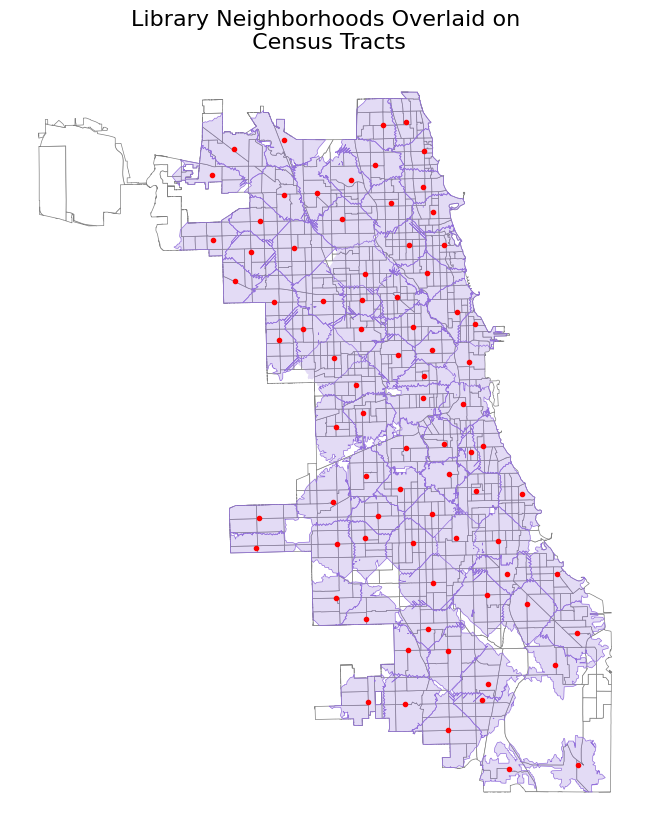

In [106]:
#allAvgWalkingTime['geometry'] = walkingNeighborhoods['geometry']

allAvgWalkingTime['geometry'] = walkingNeighborhoods['geometry']
allAvgWalkingTime = gpd.GeoDataFrame(
    allAvgWalkingTime.loc[:, [c for c in allAvgWalkingTime.columns if c != "geometry"]],
    geometry=gpd.GeoSeries.from_wkt(allAvgWalkingTime["geometry"]),
    crs="epsg:4326",
    )

allAvgWalkingTime = gpd.clip(allAvgWalkingTime,combinedCensusTracts)


fig, ax = plt.subplots(1, figsize=(10, 10))
base = censusTracts.plot(ax=ax, color='white', edgecolor='gray', linewidth = .5)

allAvgWalkingTime.plot(ax=base, alpha = .25, color='mediumpurple')
allAvgWalkingTime.boundary.plot(ax=base, edgecolor='mediumpurple', linewidth = .5, alpha = 1)
branchLocsOnly.plot(ax=base, marker='o', color='red', markersize=9)
ax.axis('off')
ax.set_title('Library Neighborhoods Overlaid on\n Census Tracts', fontdict={'fontsize': '16', 'fontweight' : '3'})

/opt/tljh/user/lib/python3.9/site-packages/geopandas/geodataframe.py:1537: UserWarning: Geometry column does not contain geometry.
  warnings.warn("Geometry column does not contain geometry.")


Text(0.5, 1.0, 'Library Neighborhoods Overlaid on\n Chicago Community Areas')

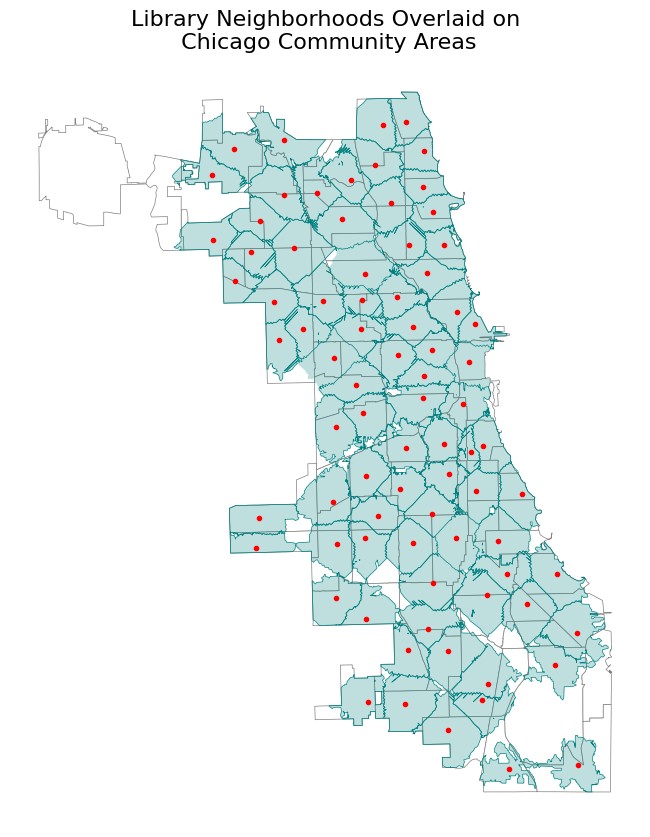

In [94]:
allAvgWalkingTime['geometry'] = walkingNeighborhoods['geometry']
allAvgWalkingTime = gpd.GeoDataFrame(
    allAvgWalkingTime.loc[:, [c for c in allAvgWalkingTime.columns if c != "geometry"]],
    geometry=gpd.GeoSeries.from_wkt(allAvgWalkingTime["geometry"]),
    crs="epsg:4326",
    )

allAvgWalkingTime = gpd.clip(allAvgWalkingTime,chicagoCommunityAreas)


fig, ax = plt.subplots(1, figsize=(10, 10))
base = chicagoCommunityAreas.plot(ax=ax, color='white', edgecolor='gray', linewidth = .5)

allAvgWalkingTime.plot(ax=base, alpha = .25, color='teal')
allAvgWalkingTime.boundary.plot(ax=base, edgecolor='teal', linewidth = .5)
branchLocsOnly.plot(ax=base, marker='o', color='red', markersize=9)
ax.axis('off')
ax.set_title('Library Neighborhoods Overlaid on\n Chicago Community Areas', fontdict={'fontsize': '16', 'fontweight' : '3'})